# Cuaderno de trabajo estadístico

### Notas extraídas de la resolución concesión CONVOCATORIA C-003-18-ED
05/04/2019 08:39:04 
Firmada por **Luis Prieto Cuerdo - Director de Economía Digital**

05/04/2019 09:46:26
Firmada por **David Cierco Jiménez de Parga - Director General de la Entidad Pública Empresarial**


### Cargamos el fichero de texto separado por tabulación

In [177]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
data = pd.read_csv("red.tsv", sep='\t', lineterminator='\r')
dataP = data.values



### Extraemos los diferentes dataset y pintamos su distribución

In [126]:
lista = [row.replace(',', '.') for row in df['C1'].values]
table_innova = np.array(lista)
table_innovaf = table.astype(np.float)

In [180]:
df = pd.DataFrame(data=dataP, columns=['ID','ESTADO','C1','C2','C3','C4','NOTA','POS'])
print(df)

                       ID        ESTADO    C1    C2     C3     C4  NOTA POS
0    \n2018/C003/00007971        ESPERA  4,67  5,75      0     10  5,15  54
1    \n2018/C003/00008025  BENEFICIARIO  7,33  8,75  10,00  10,00  8,63   2
2    \n2018/C003/00008346        ESPERA  5,00  5,25   1,43     10   5,3  50
3    \n2018/C003/00009155        ESPERA  4,33  5,25      0     10  4,85  62
4    \n2018/C003/00009158   DESESTIMADA  2,67  0,00      0      0     0   0
5    \n2018/C003/00009515  BENEFICIARIO  4,33  4,00  10,00  10,00  5,92  34
6    \n2018/C003/00009915   DESESTIMADA  2,33  0,00      0      0     0   0
7    \n2018/C003/00010221        ESPERA  6,67  6,75      0      6   5,6  45
8    \n2018/C003/00010898  BENEFICIARIO  5,33  5,75  10,00  10,00  6,88  20
9    \n2018/C003/00010900  BENEFICIARIO  4,33  4,00  10,00  10,00  5,92  35
10   \n2018/C003/00012246        ESPERA  4,00  5,00      0     10  4,65  68
11   \n2018/C003/00014557  BENEFICIARIO  8,00  5,75   7,14  10,00  7,38  11
12   \n2018/

### Distribución gráfica de las notas emitidas en INNOVACIÓN con 75% < 3.5

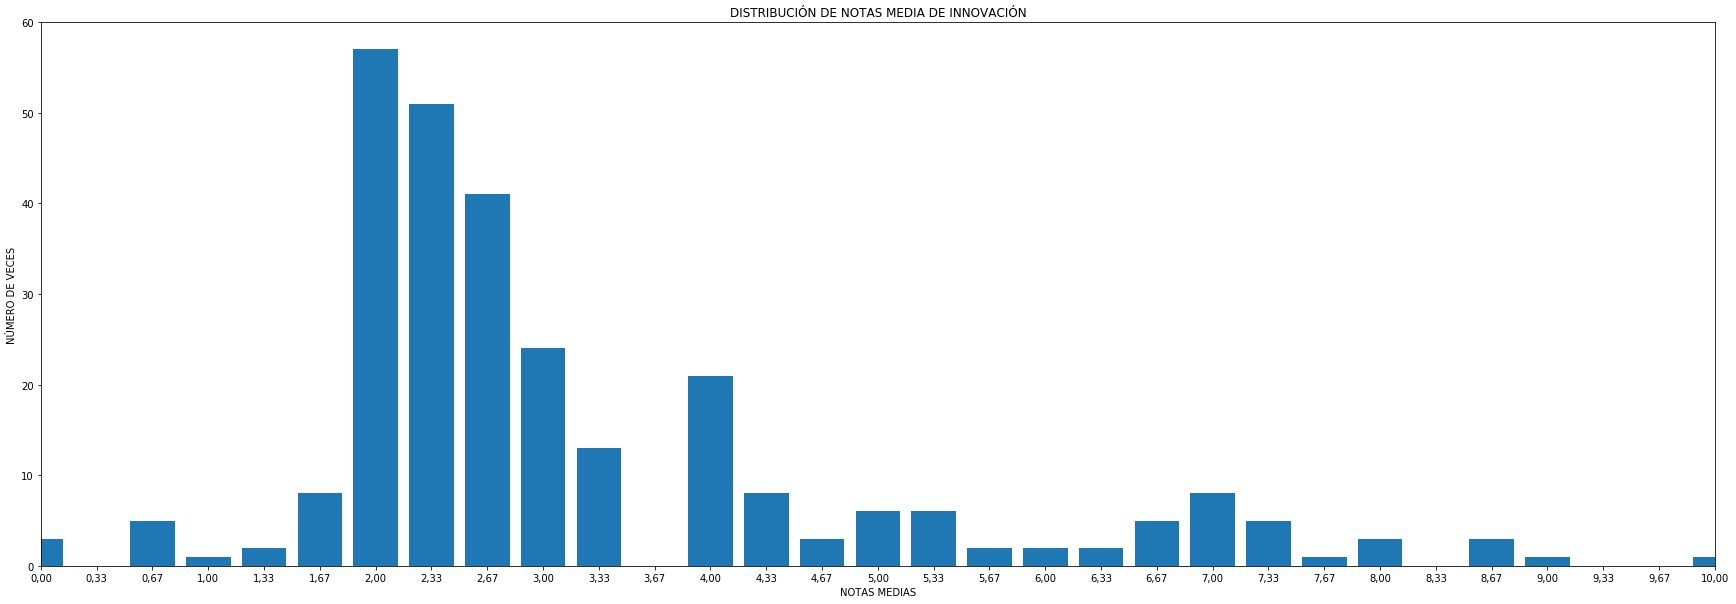

In [179]:
histog = []
espacio_muestral = ['0,00', '0,33', '0,67', '1,00', '1,33', '1,67', '2,00', '2,33', '2,67',
                    '3,00', '3,33', '3,67', '4,00', '4,33', '4,67', '5,00', '5,33', '5,67',
                    '6,00', '6,33', '6,67', '7,00', '7,33', '7,67', '8,00', '8,33', '8,67',
                    '9,00', '9,33', '9,67', '10,00']
for d1 in espacio_muestral:
    histog.append((df['C1'].values == d1).sum())

np.array(histog)/len(df['C1'].values)
plt.figure(figsize=(30,10))
plt.title('DISTRIBUCIÓN DE NOTAS MEDIA DE INNOVACIÓN')
plt.xlabel('NOTAS MEDIAS')
plt.ylabel('NÚMERO DE VECES')
plt.ylim([0,60])
plt.xlim(0,30)

plt.bar(espacio_muestral, histog)
plt.savefig("red.es.png")
plt.show()

### Distribución gráfica de las notas emitidas en CALIDAD

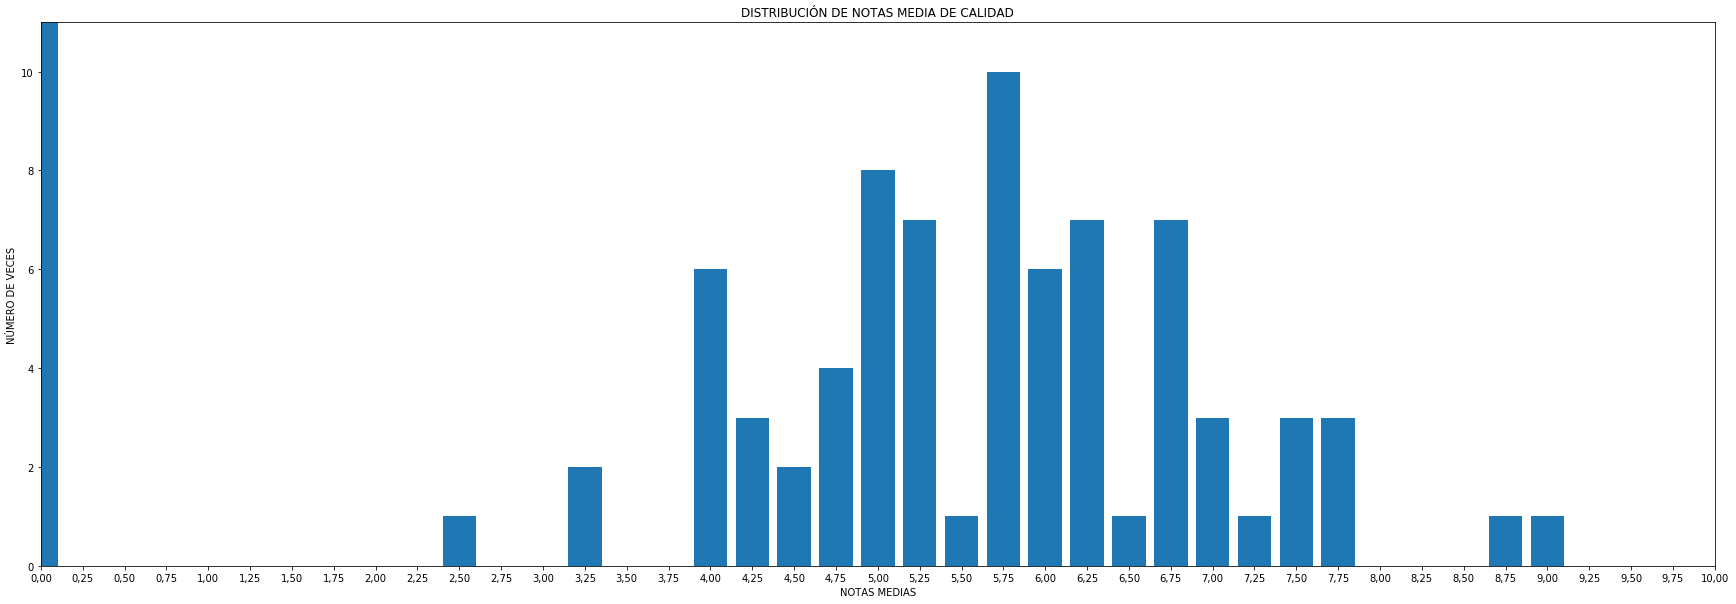

In [186]:
histog = []
espacio_muestral = ['0,00', '0,25', '0,50', '0,75', '1,00', '1,25', '1,50', '1,75',
                    '2,00', '2,25', '2,50', '2,75', '3,00', '3,25', '3,50', '3,75',
                    '4,00', '4,25', '4,50', '4,75', '5,00', '5,25', '5,50', '5,75',
                    '6,00', '6,25', '6,50', '6,75', '7,00', '7,25', '7,50', '7,75',
                    '8,00', '8,25', '8,50', '8,75', '9,00', '9,25', '9,50', '9,75', '10,00']
for d1 in espacio_muestral:
    histog.append((df['C2'].values == d1).sum())

np.array(histog)/len(df['C2'].values)
plt.figure(figsize=(30,10))
plt.title('DISTRIBUCIÓN DE NOTAS MEDIA DE CALIDAD')
plt.xlabel('NOTAS MEDIAS')
plt.ylabel('NÚMERO DE VECES')
plt.ylim([0,11])
plt.xlim(0,40)

plt.bar(espacio_muestral, histog)
plt.savefig("red.es-calidad.png")
plt.show()

### Explicación de la INCOMPATIBILIDAD MATEMÁTICA

#### Cuando participan 9 jurados cada punto individual suma 1/9
- Esto hace que puedan presentarnos 91 medias posibles
- Ej:  0,   0.11,   0.22,   0.33   ...    9.66,   9.77,   9.88   y   10

#### En las notas emitidas en INNOVACIÓN solo se han presentado medias múltiplo de 1/3
- Solo el 33% de las medias emitidas en el documento cumple con esta circunstancia
- Se precisan 30 puntos para llegar al 10 con votos de 1/3
- Las posibles configuraciones de jurado se hallan con Mínimo Común Múltiplo
- 2 * 3 * 5 = 30
- Ej. 5 jueces votando 3 subcategorías con notas 0, 1, 2

#### En las notas emitidas en CALIDAD solo se han presentado medias múltiplo de 1/4
- No es posible llegar a estas medias con 9 miembros del jurado
- Se precisan 40 puntos para llegar al 10 con votos de 1/4
- Las posibles configuraciones de jurado se hallan con Mínimo Común Múltiplo
- 2 * 2 * 2 * 5 = 40
- Ej. 5 jueces votando 4 subcategorías con notas 0, 1, 2

#### La probabilidad de que suceda en la totalidad de las 282 notas en absurdamente pequeña
- 9 jueces votando 11 notas son 9^11 = 2357947691 de combinaciones
- 785982563 de dichas combinaciones tiene una suma múltiplo de 3
- casos_favorables/casos_totales = 0.3333333330506016
- Que suceda en las 282 tiene una probabilidad combinada de 0.3333333330506016 ^ 282


In [172]:
pow(0.3333333330506016, 282)

2.830127915899589e-134


---
### Iteraciones por el producto cartesiano con todas las permutaciones con repetición
- Se busca demostrar que 1/3 de ellas es múltiplo de 1/3 cuando votan 9 jueces del 0 al 10

In [15]:
import itertools 

n_votantes = 9
casos_totales = 0
casos_favorables = 0

notas_posibles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
for p in itertools.product(notas_posibles, repeat=n_votantes):
    s = sum(p) 
    if s % 3 == 0: 
        casos_favorables = casos_favorables+1
    casos_totales = casos_totales+1

print(casos_favorables, casos_totales, casos_favorables/casos_totales)

785982563 2357947691 0.3333333330506016


---
### Iteraciones por el producto cartesiano con todas las permutaciones con repetición
- Se busca ejemplarizar la dificultad de obtener un 2 de media cuando votan 9 jueces del 0 al 10
- Tan solo un 0.06380% de las veces ocurre
- Que ocurra 16 veces consecutivas 0.00000000000000000000000000000000000000000000000008% de las veces

In [106]:
import itertools 

n_jueces = 9
nota_maxima = 10
casos_totales = 0
casos_favorables = 0
nota_buscada = 2
lista_notas = []
notas_posibles = range(0, nota_maxima +1)
valor_unidad = 1 / (n_jueces * nota_maxima) * 10

for p in itertools.product(notas_posibles, repeat=n_jueces):
    s = sum(p) 
    m = round(s*valor_unidad,2)
    
    if m not in lista_notas:
        lista_notas.append(m)
        
    if s == (nota_buscada*n_jueces): 
        casos_favorables = casos_favorables+1
        
    casos_totales = casos_totales+1

print('Notas disponibles por juez: {0}'.format(np.array(notas_posibles)))
print('Número de jueces: {0}\n'.format(n_jueces))
print('Lista notas medias diferentes: {0}\n'.format(lista_notas))
print("Nota media buscada: ", nota_buscada)
print("Combinaciones de notas favorables: {0}\nCombinaciones totales: {1}".format(casos_favorables, casos_totales))
print("Probabilidad de sacar un {0} de media {1:.5f}%\n".format(nota_buscada, casos_favorables/casos_totales * 100))
prob = pow(casos_favorables/casos_totales , 16)
print("Probabilidad 16 veces consecutivas: {0:.50f}%".format(prob * 100))

Notas disponibles por juez: [ 0  1  2  3  4  5  6  7  8  9 10]
Número de jueces: 9

Lista notas medias diferentes: [0.0, 0.11, 0.22, 0.33, 0.44, 0.56, 0.67, 0.78, 0.89, 1.0, 1.11, 1.22, 1.33, 1.44, 1.56, 1.67, 1.78, 1.89, 2.0, 2.11, 2.22, 2.33, 2.44, 2.56, 2.67, 2.78, 2.89, 3.0, 3.11, 3.22, 3.33, 3.44, 3.56, 3.67, 3.78, 3.89, 4.0, 4.11, 4.22, 4.33, 4.44, 4.56, 4.67, 4.78, 4.89, 5.0, 5.11, 5.22, 5.33, 5.44, 5.56, 5.67, 5.78, 5.89, 6.0, 6.11, 6.22, 6.33, 6.44, 6.56, 6.67, 6.78, 6.89, 7.0, 7.11, 7.22, 7.33, 7.44, 7.56, 7.67, 7.78, 7.89, 8.0, 8.11, 8.22, 8.33, 8.44, 8.56, 8.67, 8.78, 8.89, 9.0, 9.11, 9.22, 9.33, 9.44, 9.56, 9.67, 9.78, 9.89, 10.0]

Nota media buscada:  2
Combinaciones de notas favorables: 1504360
Combinaciones totales: 2357947691
Probabilidad de sacar un 2 de media 0.06380%

Probabilidad 16 veces consecutivas: 0.00000000000000000000000000000000000000000000000008%


---
### Iteraciones por el producto cartesiano con todas las permutaciones con repetición
- Se busca ejemplarizar la dificultad de obtener un 2 de media cuando votan 3 jueces del 0 al 10
- Tan solo un 2.10368% de las veces ocurre
- Que ocurra 16 veces consecutivas 0.000000000000000000000000147% de las veces

In [105]:
import itertools 

n_jueces = 3
nota_maxima = 10
casos_totales = 0
casos_favorables = 0
nota_buscada = 2
lista_notas = []
notas_posibles = range(0, nota_maxima +1)
valor_unidad = 1 / (n_jueces * nota_maxima) * 10

for p in itertools.product(notas_posibles, repeat=n_jueces):
    s = sum(p) 
    m = round(s*valor_unidad,2)
    
    if m not in lista_notas:
        lista_notas.append(m)
        
    if s == (nota_buscada*n_jueces): 
        casos_favorables = casos_favorables+1
        
    casos_totales = casos_totales+1

print('Notas disponibles por juez: {0}'.format(np.array(notas_posibles)))
print('Número de jueces: {0}\n'.format(n_jueces))
print('Lista notas medias diferentes: {0}\n'.format(lista_notas))
print("Nota media buscada:", nota_buscada)
print("Combinaciones de notas favorables: {0}\nCombinaciones totales: {1}".format(casos_favorables, casos_totales))
print("Probabilidad de sacar un {0} de media {1:.5f}%\n".format(nota_buscada, casos_favorables/casos_totales * 100))
prob = pow(casos_favorables/casos_totales , 16)
print("Probabilidad 16 veces consecutivas: {0:.50f}%".format(prob * 100))

Notas disponibles por juez: [ 0  1  2  3  4  5  6  7  8  9 10]
Número de jueces: 3

Lista notas medias diferentes: [0.0, 0.33, 0.67, 1.0, 1.33, 1.67, 2.0, 2.33, 2.67, 3.0, 3.33, 3.67, 4.0, 4.33, 4.67, 5.0, 5.33, 5.67, 6.0, 6.33, 6.67, 7.0, 7.33, 7.67, 8.0, 8.33, 8.67, 9.0, 9.33, 9.67, 10.0]

Nota media buscada: 2
Combinaciones de notas favorables: 28
Combinaciones totales: 1331
Probabilidad de sacar un 2 de media 2.10368%

Probabilidad 16 veces consecutivas: 0.00000000000000000000000014712267540339975789657055%


---
### Iteraciones por el producto cartesiano con todas las permutaciones con repetición
- Se busca ejemplarizar la dificultad de obtener un 2 de media cuando votan 5 jueces del 0 al 6
- Tan solo un 4.91462% de las veces ocurre
- Que se de 16 veces consecutivas 0.0000000000000000001158% de las veces

In [104]:
import itertools 

n_jueces = 5
nota_maxima = 6
casos_totales = 0
casos_favorables = 0
nota_buscada = 2
lista_notas = []
notas_posibles = range(0, nota_maxima +1)
valor_unidad = 1 / (n_jueces * nota_maxima) * 10

for p in itertools.product(notas_posibles, repeat=n_jueces):
    s = sum(p) 
    m = round(s*valor_unidad,2)
    
    if m not in lista_notas:
        lista_notas.append(m)
        
    if s == (nota_buscada*n_jueces): 
        casos_favorables = casos_favorables+1
        
    casos_totales = casos_totales+1

print('Notas disponibles por juez: {0}'.format(np.array(notas_posibles)))
print('Número de jueces: {0}\n'.format(n_jueces))
print('Lista notas medias diferentes: {0}\n'.format(lista_notas))
print("Nota media buscada:", nota_buscada)
print("Combinaciones de notas favorables: {0}\nCombinaciones totales: {1}".format(casos_favorables, casos_totales))
print("Probabilidad de sacar un {0} de media {1:.5f}%\n".format(nota_buscada, casos_favorables/casos_totales * 100))
prob = pow(casos_favorables/casos_totales , 16)
print("Probabilidad 16 veces consecutivas: {0:.50f}%".format(prob * 100))

Notas disponibles por juez: [0 1 2 3 4 5 6]
Número de jueces: 5

Lista notas medias diferentes: [0.0, 0.33, 0.67, 1.0, 1.33, 1.67, 2.0, 2.33, 2.67, 3.0, 3.33, 3.67, 4.0, 4.33, 4.67, 5.0, 5.33, 5.67, 6.0, 6.33, 6.67, 7.0, 7.33, 7.67, 8.0, 8.33, 8.67, 9.0, 9.33, 9.67, 10.0]

Nota media buscada: 2
Combinaciones de notas favorables: 826
Combinaciones totales: 16807
Probabilidad de sacar un 2 de media 4.91462%

Probabilidad 16 veces consecutivas: 0.00000000000000000011583440067719153649045201268815%
